In [136]:
print("Hypothesis:\n\n")
print('How people are reacting working from home in California:')

Hypothesis:


How people are reacting working from home in California:


In [137]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
import pandas as pd
import matplotlib.pyplot as plt
from apscheduler.schedulers.blocking import BlockingScheduler
from textblob import TextBlob

In [138]:
access_token = "781068775844085760-Hn0YqDvtSwRsIkjf8Sn3Tds3UroOem3"
access_token_secret = "cUVSOaTRZFtK0GF8QgEjfEXUqBTqFbUhBBsktFLMtnaBl"
consumer_key = "CEljwcJ7Q72ebyc0nMdUh0L77"
consumer_secret = "8d8X7gkZEJLGTPUN0YV1XgcgKfyvXz4S6xmlnXM1FEa01XSVRw"
var = tweepy.OAuthHandler(consumer_key, consumer_secret)
var.set_access_token(access_token, access_token_secret)
api = tweepy.API(var,wait_on_rate_limit=True)

In [139]:
print("Figuring out the sentiments of people about working from home. Using textBlob for finding if tweets about working from home are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.")

Figuring out the sentiments of people about working from home. Using textBlob for finding if tweets about working from home are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.


In [140]:
total_tweet = []
cnt_sentiment_cal = []

count1 = 0

try :

    query = ['Wfh -filter:retweets']
    max_tweets = 4526

    print("Fetching data from api For California")
    tweets = tweepy.Cursor(api.search,q=query,language='en',geocode = "31.578871,74.305184,5000mi").items(max_tweets)
    print("Data fetched")

    print("Begning to parse data for sentiment analysis")
    for tweet in tweets:   
   
            total_tweet.append({"text":tweet.text,"created_at":tweet.created_at.strftime("%x")})
            count1=count1+1
    
            if(count1 % 10 == 0):
                print(str((count1/max_tweets)*100)+"% done" )
   
                analysis = TextBlob(tweet.text)
            if analysis.sentiment[0]>0:
                cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"positive","created_at":tweet.created_at.strftime("%m-%d")})
        
            elif analysis.sentiment[0]< 0:
                 cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"negative","created_at":tweet.created_at.strftime("%m-%d")})

except:
    print("Error in fetching data")

finally:
    print("Completing process")

Fetching data from api For California
Data fetched
Begning to parse data for sentiment analysis
0.2% done
0.4% done
0.6% done
0.8% done
1.0% done
1.2% done
1.4000000000000001% done
1.6% done
1.7999999999999998% done
2.0% done
2.1999999999999997% done
2.4% done
2.6% done
2.8000000000000003% done
3.0% done
3.2% done
3.4000000000000004% done
3.5999999999999996% done
3.8% done
4.0% done
4.2% done
4.3999999999999995% done
4.6% done
4.8% done
5.0% done
5.2% done
5.4% done
5.6000000000000005% done
5.800000000000001% done
6.0% done
6.2% done
6.4% done
6.6000000000000005% done
6.800000000000001% done
7.000000000000001% done
7.199999999999999% done
7.3999999999999995% done
7.6% done
7.8% done
8.0% done
8.200000000000001% done
8.4% done
8.6% done
8.799999999999999% done
9.0% done
9.2% done
9.4% done
9.6% done
9.8% done
10.0% done
10.2% done
10.4% done
10.6% done
10.8% done
11.0% done
11.200000000000001% done
11.4% done
11.600000000000001% done
11.799999999999999% done
12.0% done
12.2% done
12.4% 

In [142]:
print("Total number of tweets working from home in California: "+ str(count1))
print("Total number of sentiment tweets which are negative and positive :"+ str(len(cnt_sentiment_cal)))

Total number of tweets working from home in California: 4526
Total number of sentiment tweets which are negative and positive :2509


In [143]:
print('Using pandas to clean the tweets collected and to create data frame. ')

Using pandas to clean the tweets collected and to create data frame. 


In [144]:
data_pd=pd.DataFrame(cnt_sentiment_cal)
data_pd=data_pd[["text", "Sentiment","created_at"]]
data_pd.head(5)

,text,Sentiment,created_at
0,RT @_drbruced: Happy Earth Day! I normally wou...,positive,04-27
1,@granny_1857 WFH is luxury.,positive,04-27
2,Great advice to ensure your WFH claims are acc...,positive,04-27
3,Had to shoot out to grab some milk as coffee i...,positive,04-27
4,Standard Work Wear (now). #wfh⁠\nWe go from le...,positive,04-27


In [145]:
data_pd.to_csv("tweet_data.csv") #Storing data to csv

In [146]:
data_pd = pd.read_csv("tweet_data.csv") #Read file
data_pd.head(10) #Reading data from csv

,Unnamed: 0,text,Sentiment,created_at
0,0,RT @_drbruced: Happy Earth Day! I normally wou...,positive,04-27
1,1,@granny_1857 WFH is luxury.,positive,04-27
2,2,Great advice to ensure your WFH claims are acc...,positive,04-27
3,3,Had to shoot out to grab some milk as coffee i...,positive,04-27
4,4,Standard Work Wear (now). #wfh⁠\r\nWe go from ...,positive,04-27
5,5,@nickwilsdon Anyone who does not think #COVID1...,positive,04-27
6,6,We know how much you miss to ride those toughe...,positive,04-27
7,7,"#pandemic - It happened, impacted and gone! Th...",positive,04-27
8,8,RT @researchwhisper: Today's #virtualnotviral ...,positive,04-27
9,9,"Despite the uncertainty generated by Covid-19,...",positive,04-27


In [147]:
print('Total number of positive tweets and total number of negative tweets from the sentiment data in csv.')
sentiment_data=cnt_sentiment_cal
grouped_data = pd.DataFrame(data_pd.groupby(["Sentiment"])["created_at"].count()).reset_index()
grouped_data.rename(columns = {'created_at': 'Count'}, inplace = True)
grouped_data.head()

Total number of positive tweets and total number of negative tweets from the sentiment data in csv.


,Sentiment,Count
0,negative,520
1,positive,1989


Bar graph to show positive and negative tweets collected in California to record the sentiment of people who are either happy  or sad about working from home


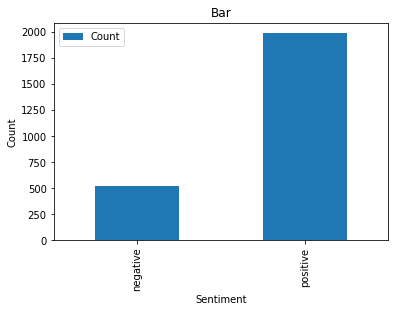

<Figure size 432x288 with 0 Axes>

In [148]:
print("Bar graph to show positive and negative tweets collected in California to record the sentiment of people who are either happy  or sad about working from home")
#Filter the DataFrame down only to those columns to chart
bar_plot_data = grouped_data[["Sentiment","Count"]]
bar_plot_data = bar_plot_data.set_index("Sentiment")

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot_data.plot(kind="bar")
plt.title("Bar")
plt.ylabel("Count")
plt.show()
plt.savefig("Bar_Count_Positive_Negative_WFH.png")

Pie chart to show positive and negative tweets about working from home in California: 
 

Percentage of Negative tweets: 20.72538860103627 %
Percentage of Positive tweets: 79.27461139896373 %

 
Pie Chart :


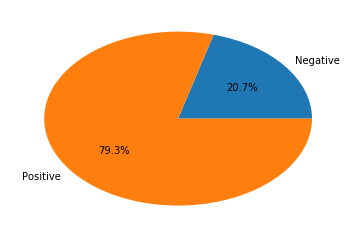

In [149]:
print('Pie chart to show positive and negative tweets about working from home in California: \n \n')
sentiment_count = (data_pd.groupby(["Sentiment"])["created_at"].count()).tolist()
labels = ["Negative", "Positive"]
colors = [ "blue","orange"]
plt.pie(sentiment_count,autopct="%1.1f%%",labels=labels)

labels = ['Orange - positive', 'Blue negative']


positive_percent=(sentiment_count[0]*100)/(sentiment_count[0]+sentiment_count[1])

print("Percentage of Negative tweets: "+ str(positive_percent) +" %")
print("Percentage of Positive tweets: "+str((sentiment_count[1]*100)/(sentiment_count[0]+sentiment_count[1]))+(" %"))
print("\n \nPie Chart :")
plt.savefig("PieChart_Positive_Negative_WFH.png")

In [150]:
print("Analysis 1: To show how people are positive or negative working from home \n")
print('More people are positive about working from home in California. Pie graph and Bar graph shows how. ')

Analysis 1: To show how people are positive or negative working from home 

More people are positive about working from home in California. Pie graph and Bar graph shows how. 


In [151]:
print("Total number of people positive and negative working from home based on dates.\n \n")
twitter_date = pd.DataFrame(data_pd.groupby(["created_at","Sentiment"]).count()).reset_index()
twitter_date.rename(columns = {'text': 'Count'}, inplace = True)
twitter_date.sort_values(by=['created_at'])

twitter_date.head()

Total number of people positive and negative working from home based on dates.
 



,created_at,Sentiment,Unnamed: 0,Count
0,04-19,negative,37,37
1,04-19,positive,80,80
2,04-20,negative,83,83
3,04-20,positive,290,290
4,04-21,negative,70,70


In [152]:
print("Using group by to seprate positive and negative people about working from home based on dates:")
df1, df2 = [a for _, a in twitter_date.groupby(twitter_date['Sentiment'] != 'negative')]
df1.reset_index()
df1.head()


Using group by to seprate positive and negative people about working from home based on dates:


,created_at,Sentiment,Unnamed: 0,Count
0,04-19,negative,37,37
2,04-20,negative,83,83
4,04-21,negative,70,70
6,04-22,negative,49,49
8,04-23,negative,85,85


In [153]:
df2.head()

,created_at,Sentiment,Unnamed: 0,Count
1,04-19,positive,80,80
3,04-20,positive,290,290
5,04-21,positive,335,335
7,04-22,positive,345,345
9,04-23,positive,300,300


In [158]:
total_data_pd=pd.DataFrame(total_tweet)
total_data_pd=data_pd[["text","created_at"]]
total_data_pd.head(10)
total_tweet_df = pd.DataFrame(total_data_pd.groupby(["created_at"]).count()).reset_index()
total_tweet_df.rename(columns = {'text': 'Count'}, inplace = True)
total_tweet_df.sort_values(by=['created_at'])

total_tweet_df.head()


,created_at,Count
0,04-19,117
1,04-20,373
2,04-21,405
3,04-22,394
4,04-23,385


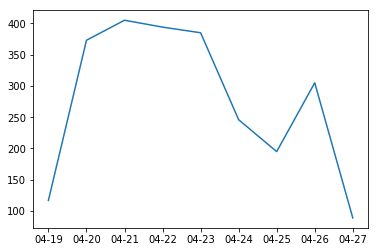

In [159]:
import numpy as np
y=total_tweet_df['Count'].tolist()
x = total_tweet_df['created_at'].tolist()
plt.plot(x,y)
plt.show()

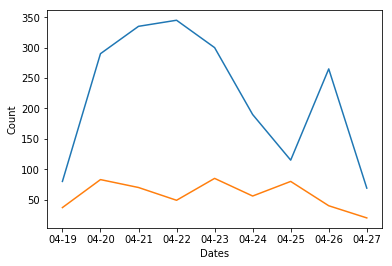

In [160]:
y2=df1['Count'].tolist()
y1=df2['Count'].tolist()
x = df1['created_at'].tolist()

# multiple line plot
plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel("Count")
plt.xlabel("Dates")
plt.savefig("Flow_basedondates_Positive_Negative_WFH.png")

In [161]:
print('Analysis 2:\n \n')
print("People are more positive working from based on tweets collected on differnt dates. Blue line shows positive comments people \nhave for working from home and Orange shows negative tweets.")


Analysis 2:
 

People are more positive working from based on tweets collected on differnt dates. Blue line shows positive comments people 
have for working from home and Orange shows negative tweets.
